In [72]:
#%pip install -U matplotlib
#%pip install scipy
#%pip install seaborn
#%pip install statsmodels
#%pip install openpyxl

     ------------------------------------ 250.0/250.0 kB 295.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\som9ju\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import seaborn as sns
import statsmodels.api as sm


In [4]:
# ***** EJERCICIO 1 *****
# Determinar la localizacion del dataframe
boston_url = "C:/Users/som9ju/Desktop/boston_housing.csv"

# Cargar dataframe
boston_df=pd.read_csv(boston_url)

# Contar el numero de casas situadas cerca y lejos del lago
rio_counts = boston_df["CHAS"].value_counts()

# Imprimir variable "rio_counts"
print(rio_counts)

# Calcular estadistico t-test
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"], 
                      boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var = True)

#*** Mejora ***
# Calcular medias de 0 y 1 
#far_rio = boston_df[boston_df["CHAS"] == 0]["MEDV"].mean
#near_rio = boston_df[boston_df["CHAS"] == 1]["MEDV"].mean
#print("Media de lejos del rio",far_rio)
#print("Media de cerca del rio",near_rio)

#*** Mejora ***
# Agregar una columna al df para cambiar nombre de 0 y 1 en lejos y cerca del lago




CHAS
0.0    471
1.0     35
Name: count, dtype: int64


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

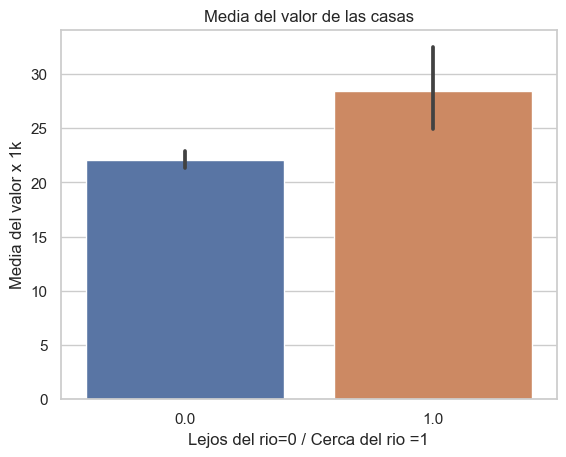

In [5]:
#pyplot.bar(boston_df.CHAS(), boston_df.CHAS.value_counts().color=["red","blue"])

#plt.bar(boston_df.CHAS.value_counts(),color=["red","blue"])
#pyplot.xlabel("Casas cerca del rio (1=cerca/0=lejos)")
#pyplot.ylabel("Numero de casa")
#pyplot.title("Grafica de barras de casas")

house_eval = boston_df.groupby("CHAS")[["MEDV"]].mean()
sns.set(style="whitegrid")
ax=sns.barplot(x="CHAS", y="MEDV", data=boston_df).set(xlabel="Lejos del rio=0 / Cerca del rio =1",ylabel="Media del valor x 1k",title="Media del valor de las casas")
plt.show()

In [7]:
lower = boston_df[(boston_df["AGE"] <=35)]["AGE"]
middle = boston_df[(boston_df["AGE"] >35)&(boston_df["AGE"]<=67)]["AGE"]
upper = boston_df[(boston_df["AGE"] >67)]['AGE']

f_statistic, p_value = scipy.stats.f_oneway(lower, middle, upper)
print("F Statistics: {0}, P-Value: {1}" .format(f_statistic,p_value))
#print(p_value)




F Statistics: 2059.6293834900835, P-Value: 5.413811724491792e-243


F Statistics: 2059.6293834900835, P-Value: 5.413811724491792e-243


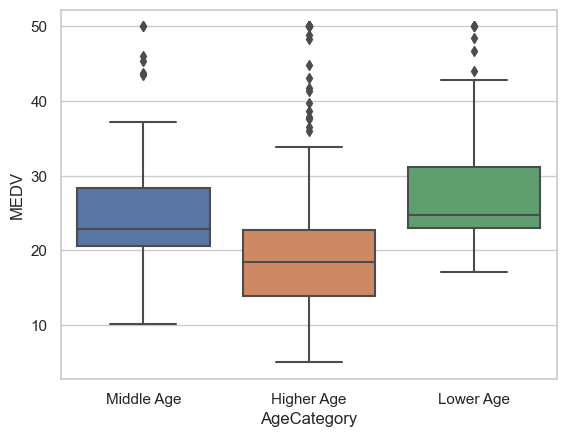

In [13]:
# ***** EJERCICIO 2 *****
# Se agrega al Data Frame original (boston_df) el texto (tag) de la informacion de los grupos de "AGE"
boston_df["AgeCategory"] = "Dummy" # Se crea la columna "AgeCategory" en el dataframe "boston_df" y se llenan los espacios con el texto "Dummy"
boston_df.loc[(boston_df["AGE"] <=35),"AgeCategory"] = "Lower Age" # Se agrega al df los datos que se encuentran en el rango establecido y se re escribe con la leyenda "lower Age" en la columna AgeCategory
boston_df.loc[(boston_df["AGE"] >35)&(boston_df["AGE"]<=67),"AgeCategory"] = "Middle Age" # Se agregan tambien los valores para esta categoria
boston_df.loc[(boston_df["AGE"] >67),"AgeCategory"] = "Higher Age" # Se agregan tambien los valores para esta categoria

# Se desarrolla el ANOVA
from scipy.stats import f_oneway
print("F Statistics: {0}, P-Value: {1}" .format(f_statistic,p_value))

# Desarrollar diagrama de caja o Boxplot
ax = sns.boxplot(x = "AgeCategory",y= "MEDV", data=boston_df)

Correlacion de Pearso= 0.7636514469209157 p-value= 7.91336106123623e-98


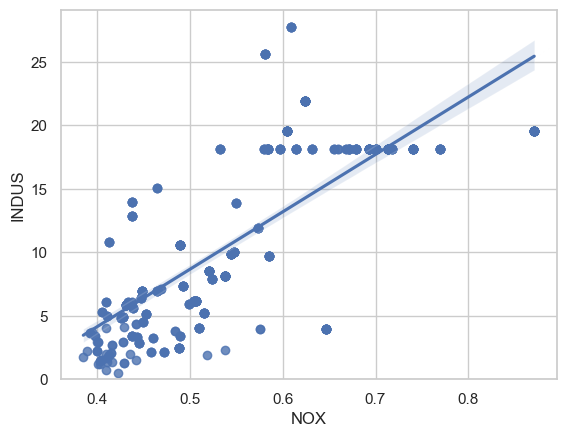

In [8]:
# ***** EJERCICIO 3 *****
# Concluir que no existe relacion entre las concentraciones de oxido nitrico y los acres comerciales.

# Crear diagrama de dispersion.
sns.regplot(x="NOX", y="INDUS", data=boston_df)
plt.ylim(0,)

# Calcular la correlacion de pearson para las dos variables.
pearson_coef, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Correlacion de Pearso=", pearson_coef, "p-value=", p_value)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        09:18:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

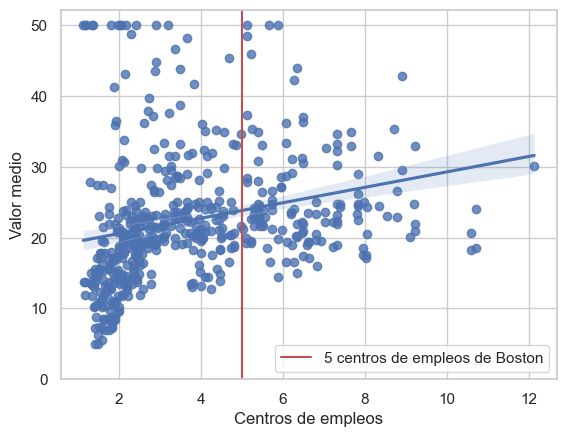

In [9]:
#***** EJERCICIO 4 *****
# Determinar el impacto entre las variables los centros de empleo y el valor medio de las viviendas ocupadas.

# Se desarrolla la grafica de correlacion
sns.regplot(x="DIS", y="MEDV", data=boston_df)
plt.axvline(x=5, color="r", label="5 centros de empleos de Boston")
plt.ylabel("Valor medio")
plt.xlabel("Centros de empleos")
plt.legend()
plt.ylim(0,)

# Se corre analisis de regresion
x = boston_df["DIS"]
y = boston_df["MEDV"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

